In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('/kaggle/input/medication-efficiency/medication dataset.csv')
df.head()

,Dosage_mg,Age,Symptom_Severity,Recovery_Time_Days,Previous_Medications,Side_Effects_Severity,Effective
0,330,45,7,20,2,3,1
1,180,36,5,15,1,1,0
2,450,58,9,22,4,4,1
3,250,63,6,10,3,2,0
4,120,30,4,12,2,0,0


In [3]:
df.columns = df.columns.str.strip()

In [4]:
# Train-test split
X = df[['Dosage_mg', 'Age', 'Symptom_Severity', 'Recovery_Time_Days', 'Previous_Medications', 'Side_Effects_Severity']]
y = df['Effective']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model (or Logistic Regression model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Predict
predictions = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



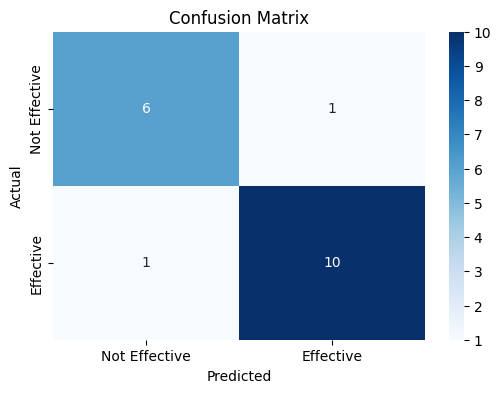

In [6]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Effective', 'Effective'], yticklabels=['Not Effective', 'Effective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

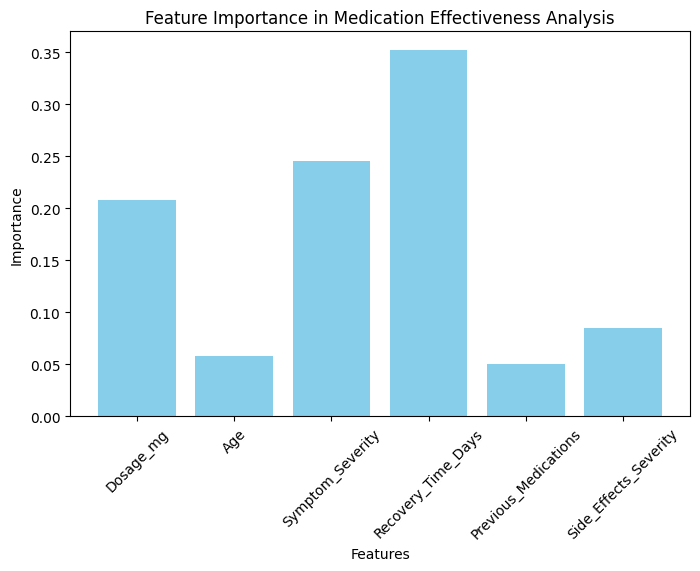

In [7]:
# Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(X.columns, feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Medication Effectiveness Analysis')
plt.xticks(rotation=45)
plt.show()